In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense


In [2]:
# Load the dataset
df = pd.read_csv("C:\\Users\\rinuc\\Desktop\\DS assignments\\Assignment 16\\gas_turbines.csv")

# Select features and target variable
X = df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX']]
y = df['TEY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Hidden layers (customize as needed)
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output layer
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [5]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/50
376/376 [==============================] - 2s 2ms/step - loss: 5348.8579 - val_loss: 268.2323
Epoch 2/50
376/376 [==============================] - 1s 2ms/step - loss: 175.5280 - val_loss: 124.1272
Epoch 3/50
376/376 [==============================] - 1s 2ms/step - loss: 93.1695 - val_loss: 72.7025
Epoch 4/50
376/376 [==============================] - 1s 2ms/step - loss: 55.4269 - val_loss: 43.7416
Epoch 5/50
376/376 [==============================] - 1s 2ms/step - loss: 33.4544 - val_loss: 26.5394
Epoch 6/50
376/376 [==============================] - 1s 2ms/step - loss: 19.3422 - val_loss: 14.5153
Epoch 7/50
376/376 [==============================] - 1s 2ms/step - loss: 10.7941 - val_loss: 7.9514
Epoch 8/50
376/376 [==============================] - 1s 2ms/step - loss: 5.8422 - val_loss: 4.5554
Epoch 9/50
376/376 [==============================] - 1s 2ms/step - loss: 3.4750 - val_loss: 2.5358
Epoch 10/50
376/376 [==============================] - 1s 2ms/step - loss: 2.0680 

In [6]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


94/94 [==============================] - 0s 1ms/step
Mean Squared Error: 0.365452406896598


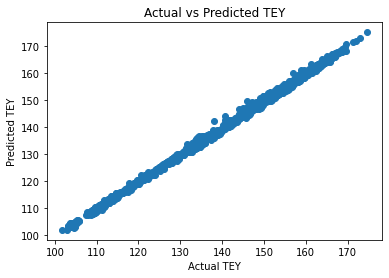

In [7]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual TEY')
plt.ylabel('Predicted TEY')
plt.title('Actual vs Predicted TEY')
plt.show()


In [9]:
'''Hyperparameter tuning and feature engineering may be incoperated, but since the mse is satisfactory not including it'''

'Hyperparameter tuning and feature engineering may be incoperated, but since the mse is satisfactory not including it'

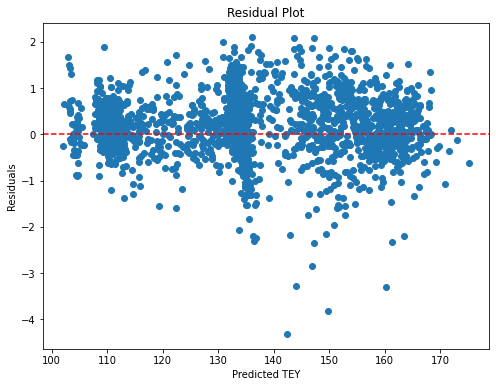

In [8]:
# Residual Plot
residuals = y_test - y_pred.squeeze()
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted TEY')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

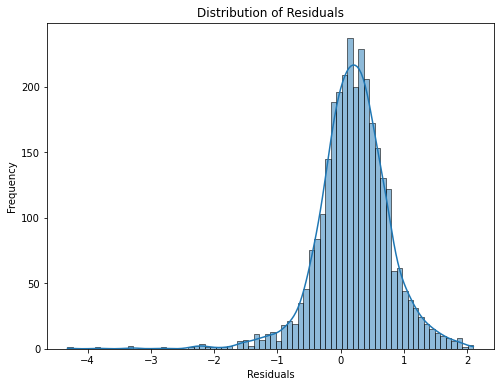

In [10]:
# Distribution Plot
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

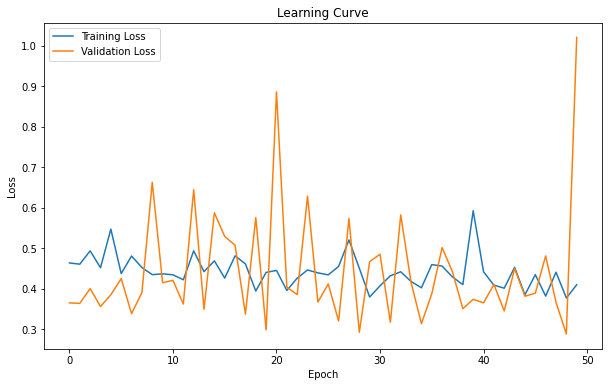

In [12]:
# Learning Curve
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

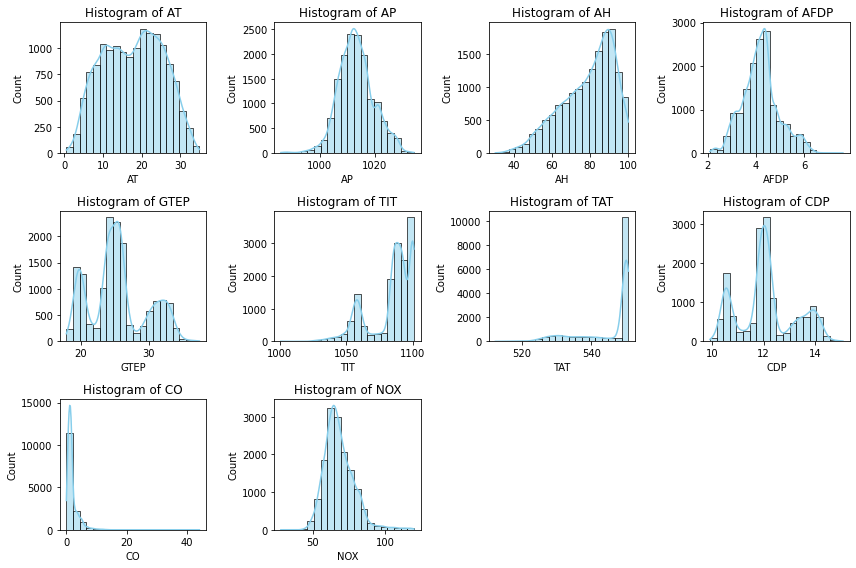

In [13]:
# Histograms
plt.figure(figsize=(12, 8))
for i, column in enumerate(X.columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(data=df, x=column, kde=True, color='skyblue', bins=20)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

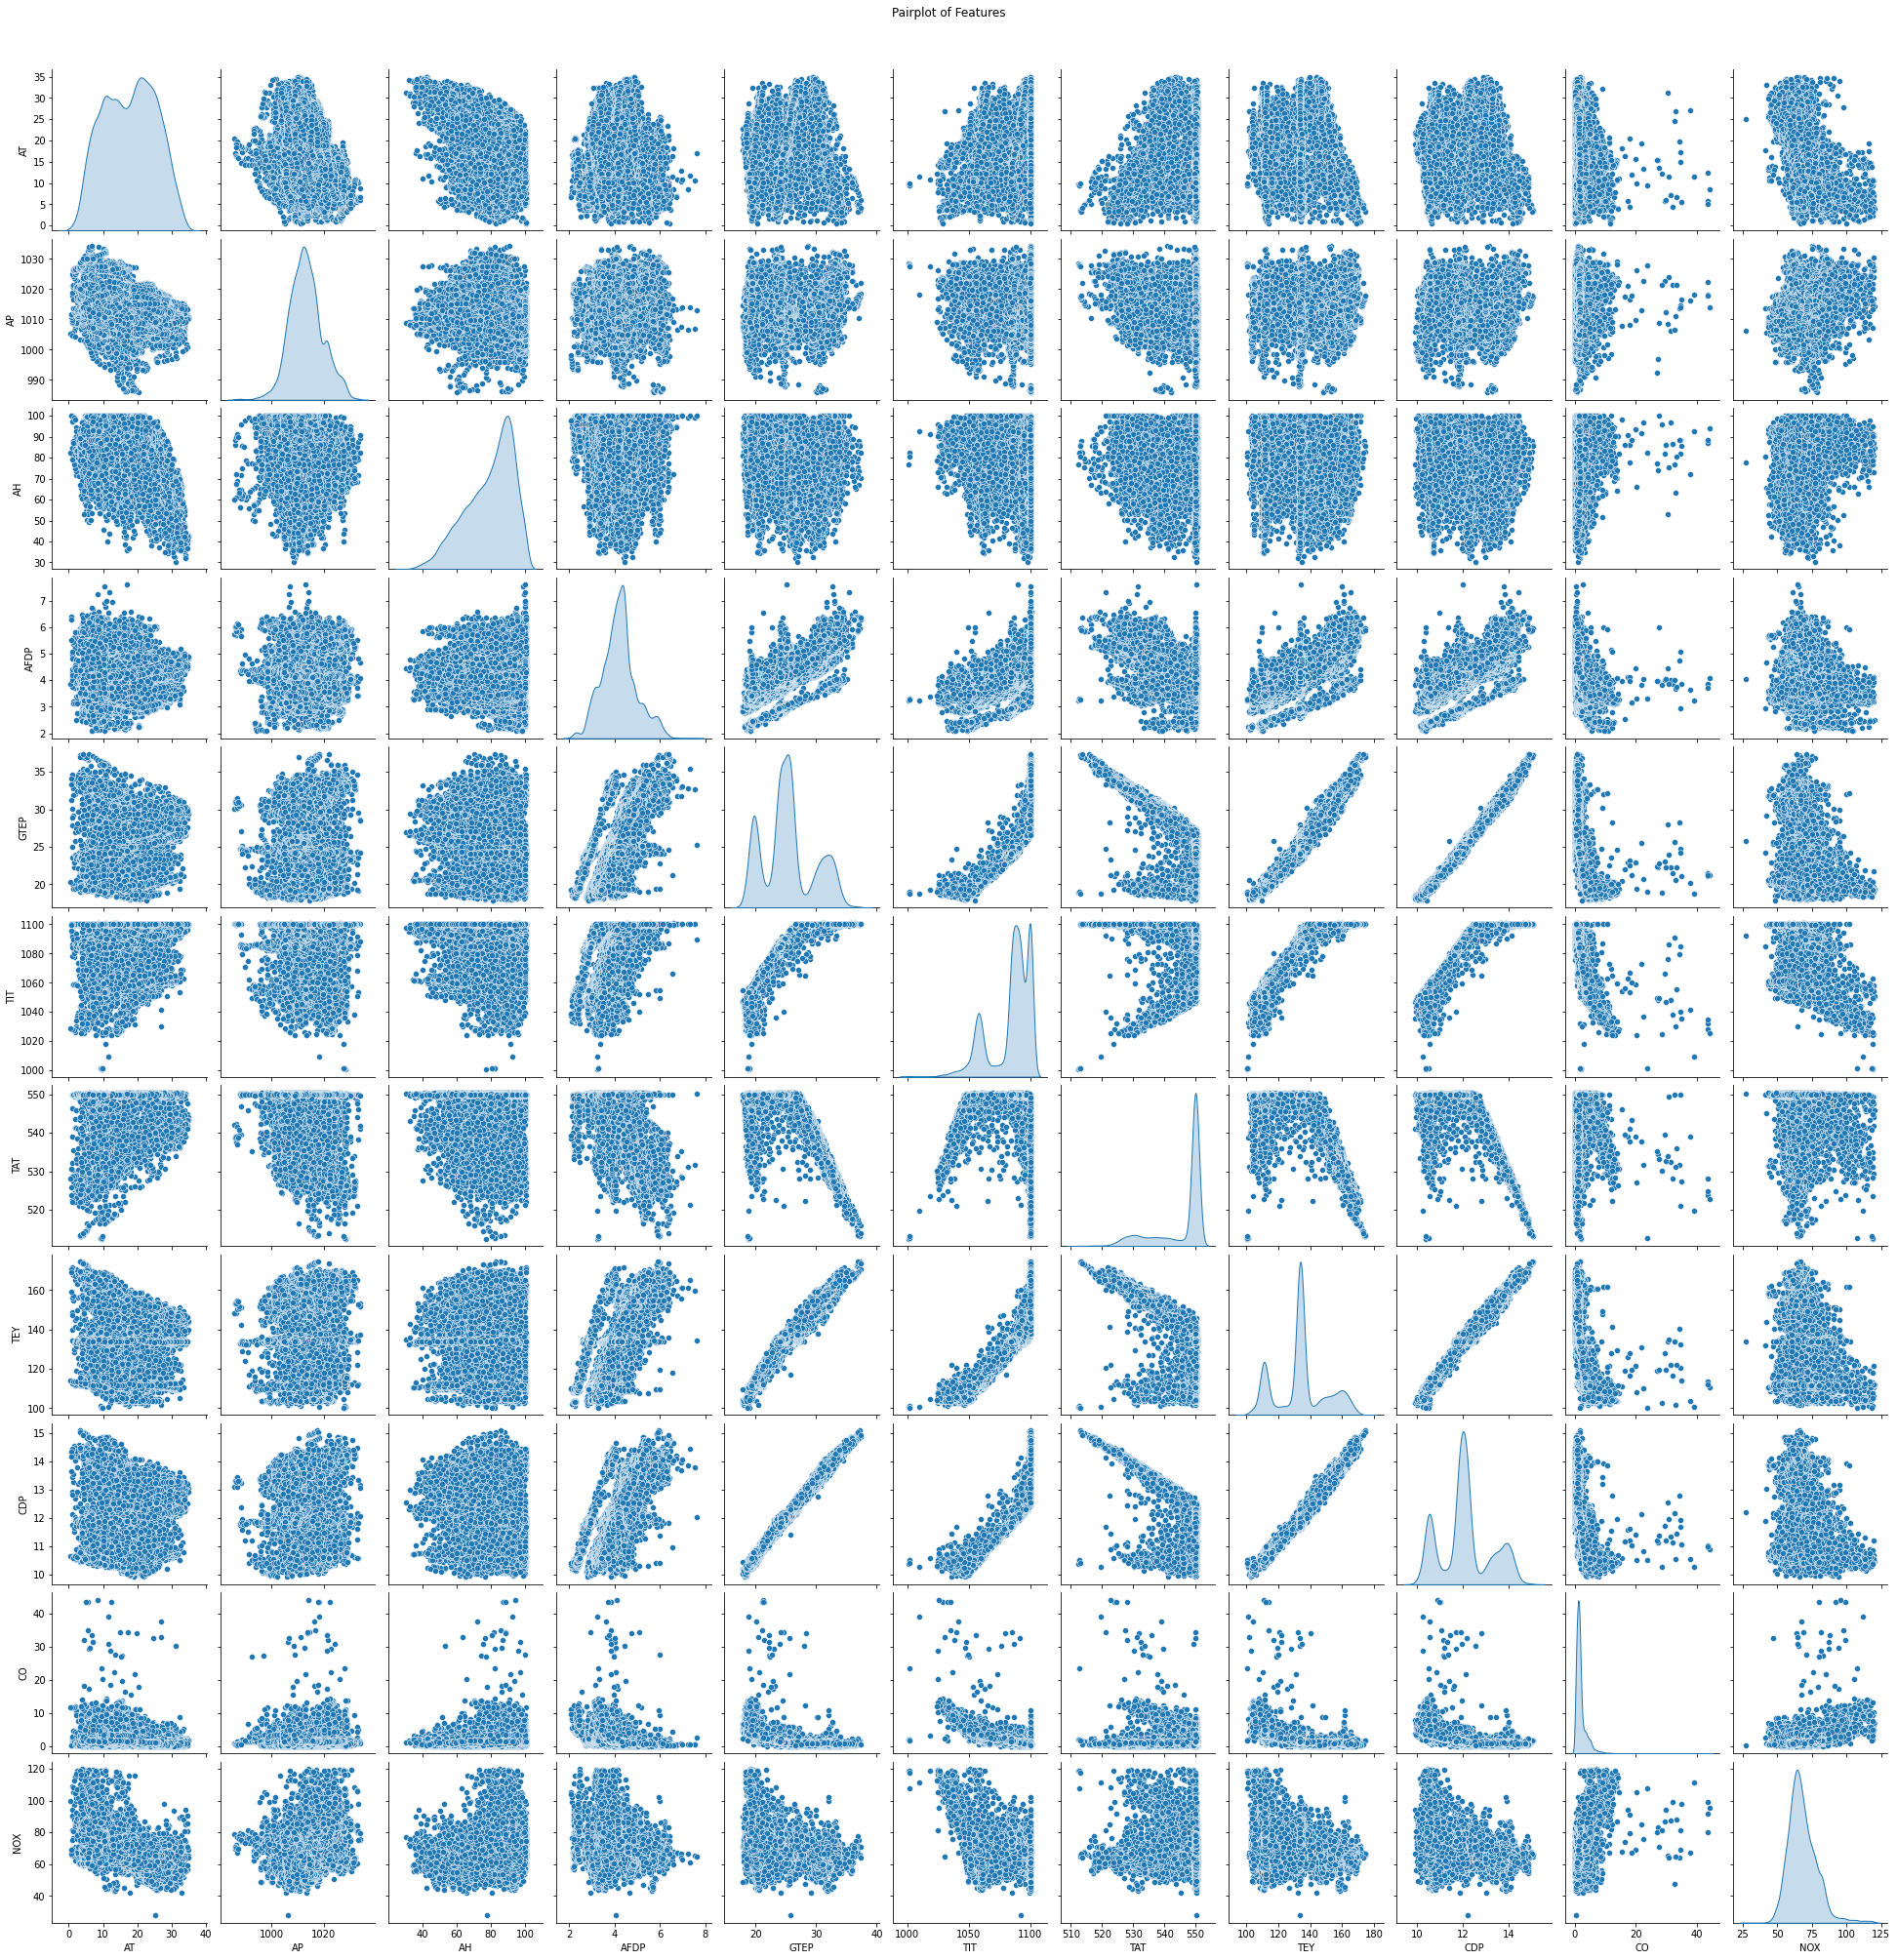

In [14]:
# Scatter plot matrix (pairplot)
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

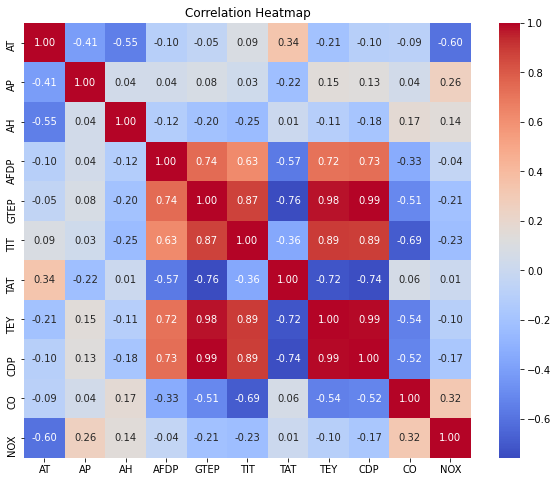

In [15]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()